In [3]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import spearmanr
from collections import defaultdict, Counter


from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_val_predict

from sklearn.decomposition import SparsePCA 

import joblib 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline 

In [4]:
from LeL_utils import train_regressor, embeddings_preparation 

In [5]:
unaccusative = ["appear", "arise", "awake", "come", "dawn", "emanate", "emerge", "erupt", "evolve",
                "flow", "grow", "issue", "die", "materialize", "result", "rise", "stem", "stream", "supervene",
                "surge", "wax", "disappear", "expire", "lapse", "perish", "vanish", "ensue",
                "eventuate", "happen", "occur", "recur", "transpire", "abate", "advance", "age", "air", 
                "alter", "atrophy", "awake", "balance", "blur", 
                "burn", "burst", "capsize", "change", "clog", "close", "collapse", "collect", 
                "compress", "condense", "contract", "corrode", "crumble", "decompose", "decrease", 
                "deflate", "defrost", "degrade", "diminish", "dissolve", "distend", "divide", 
                "double", "drain", "ease", "enlarge", "expand", "explode", "fade", "fill", "flood", 
                "fray", "freeze", "fuse", "grow", "halt", "heal", "heat", "hush", "ignite", "improve",
                "increase", "inflate", "kindle", "light", "mature", "melt", "multiply", "overturn", 
                "pop", "rekindle", "reproduce", "rupture", "scorch", "sear", "shrink", "shrivel", 
                "singe", "sink", "soak", "spray", "sprout", "steep", "stretch", "submerge", "subside", 
                "taper", "thaw", "tilt", "tire", "topple", "triple", "unfold", "vary", "warp", "clear", 
                "cool", "dim", "dry", "dull", "empty", "even", "level", "loosen", "mellow", "narrow", 
                "pale", "quiet", "shut", "slow", "smooth", "sober", "sour", "steady", "tense", 
                "triple", "warm", "break", "drift", "float", "glide", "move", "revolve", "rotate", "turn", 
                "break", "crack", "fracture", "rip", "shatter", "splinter", "split", "tear", "close", 
                "evaporate", "bend", "increase", "sink", "shrink", "drown", "break", "change", "drop", "fall", "die"]

unergative = ["run", "talk", "resign", "work", "dance", "eat", "sleep", "walk", 
              "laugh", "shout", "caugh", "laugh", "fly", "sing", "yawn", "swim"]

intransitive = unaccusative+unergative

In [7]:
#upload the semantic spaces for both arguments
sspace_nsubj = pd.read_csv("..\\Data\\Semantic_Spaces\\sspace_spr2_nsubj.csv", index_col = 'Token.Sent')
sspace_dobj = pd.read_csv("..\\Data\\Semantic_Spaces\\sspace_spr2_dobj.csv",  index_col = 'Token.Sent')
properties = sspace_nsubj.columns

## Train Regressor with BabyBERTa Embeddings

In [8]:
#baby BERTa
model_emb_path = "target_embeddings_BabyBERTa-2.pkl"
bb_dict_nsubj, bb_dict_dobj, final_sspace_nsubj, final_sspace_dobj = embeddings_preparation(model_emb_path, 
                                                                    sspace_nsubj,
                                                                    sspace_dobj, 
                                                                    model_name = "BabyBERTa",
                                                                    return_new_sspace= True,
                                                                    dir_path = "..\\Data\\Extracted_Embeddings")

new_index = [i.split(".")[0].strip() for i in final_sspace_nsubj.index.tolist()]
final_sspace_nsubj.index = new_index
verbs2remove = [i for i in final_sspace_nsubj.index if i in intransitive]
final_sspace_nsubj = final_sspace_nsubj.drop(verbs2remove)
final_sspace_nsubj.shape

bb_space_trans = pd.DataFrame(bb_dict_nsubj["BabyBERTa_nsubj"]).set_axis(new_index).drop(verbs2remove)
print(f"New shape for the transitive verb spac:{bb_space_trans.shape}")

In [14]:
#train the regrossor and save it
regr = train_regressor(model_space_trans, final_sspace_nsubj,
                         sPca = False, save_model = True,
                         model_name = "BabyBERTa",
                         output_dir = "..\\Data\\Resgressor_NoSpca")

Not using Sparse PCA


## Train Regressor with Pythia Embeddings

In [12]:
#baby BERTa
model_emb_path = "target_embeddings_pythia-70m-deduped.pkl"
pythia_dict_nsubj, pythia_dict_dobj = embeddings_preparation(model_emb_path, 
                                                                    sspace_nsubj,
                                                                    sspace_dobj, 
                                                                    model_name = "Pythia70m",
                                                                    dir_path = "..\\Data\\Extracted_Embeddings")


#reshape the model space for the transitive verbs
pythia_space_trans = pd.DataFrame(pythia_dict_nsubj["Pythia70m_nsubj"]).set_axis(new_index).drop(verbs2remove)
print(f"New shape for the transitive verb spac:{pythia_space_trans.shape}")

In [ ]:
#train the regrossor and save it
regr = train_regressor(model_space_trans, final_sspace_nsubj,
                         sPca = False, save_model = True,
                         model_name = "Pythia70m",
                         output_dir = "..\\Data\\Resgressor_NoSpca")

## Train Regressor with GPT2-XL Embeddings

In [15]:
#baby BERTa
model_emb_path = "target_embeddings_gpt2-xl.pkl"
gpt2xl_dict_nsubj, gpt2xl_dict_dobj = embeddings_preparation(model_emb_path, 
                                                                    sspace_nsubj,
                                                                    sspace_dobj, 
                                                                    model_name = "GPT2-XL",
                                                                    dir_path = "..\\Data\\Extracted_Embeddings")


#reshape the model space for the transitive verbs
gpt2xl_space_trans = pd.DataFrame(gpt2xl_dict_nsubj["GPT2-XL_nsubj"]).set_axis(new_index).drop(verbs2remove)
print(f"New shape for the transitive verb spac:{gpt2xl_space_trans.shape}")

New shape for the transitive verb spac:(1856, 1600)


In [ ]:
#train the regrossor and save it
regr = train_regressor(model_space_trans, final_sspace_nsubj,
                         sPca = False, save_model = True,
                         model_name = "GPT2-XL_nospca",
                         output_dir = "..\\Data\\Resgressor_NoSpca")

In [2]:
#load embeddings to predict
bb_ac_embs = pickle.load(open("..\\Data\\Extracted_Embeddings_AC\\target_AC_embeddings_babyBERTa-2.pkl", "rb")) 
scaled_values = list(map(lambda x :(x-x.min())/(x.max()-x.min()),bb_ac_embs.values()))

#make prediciton
y = np.array(scaled_values)
y_hat = regr.predict(y)

#make prediction dataframe
bb_predictions = pd.DataFrame(y_hat, columns = properties).set_axis(list(bb_ac_embs.keys()))

NameError: name 'pickle' is not defined

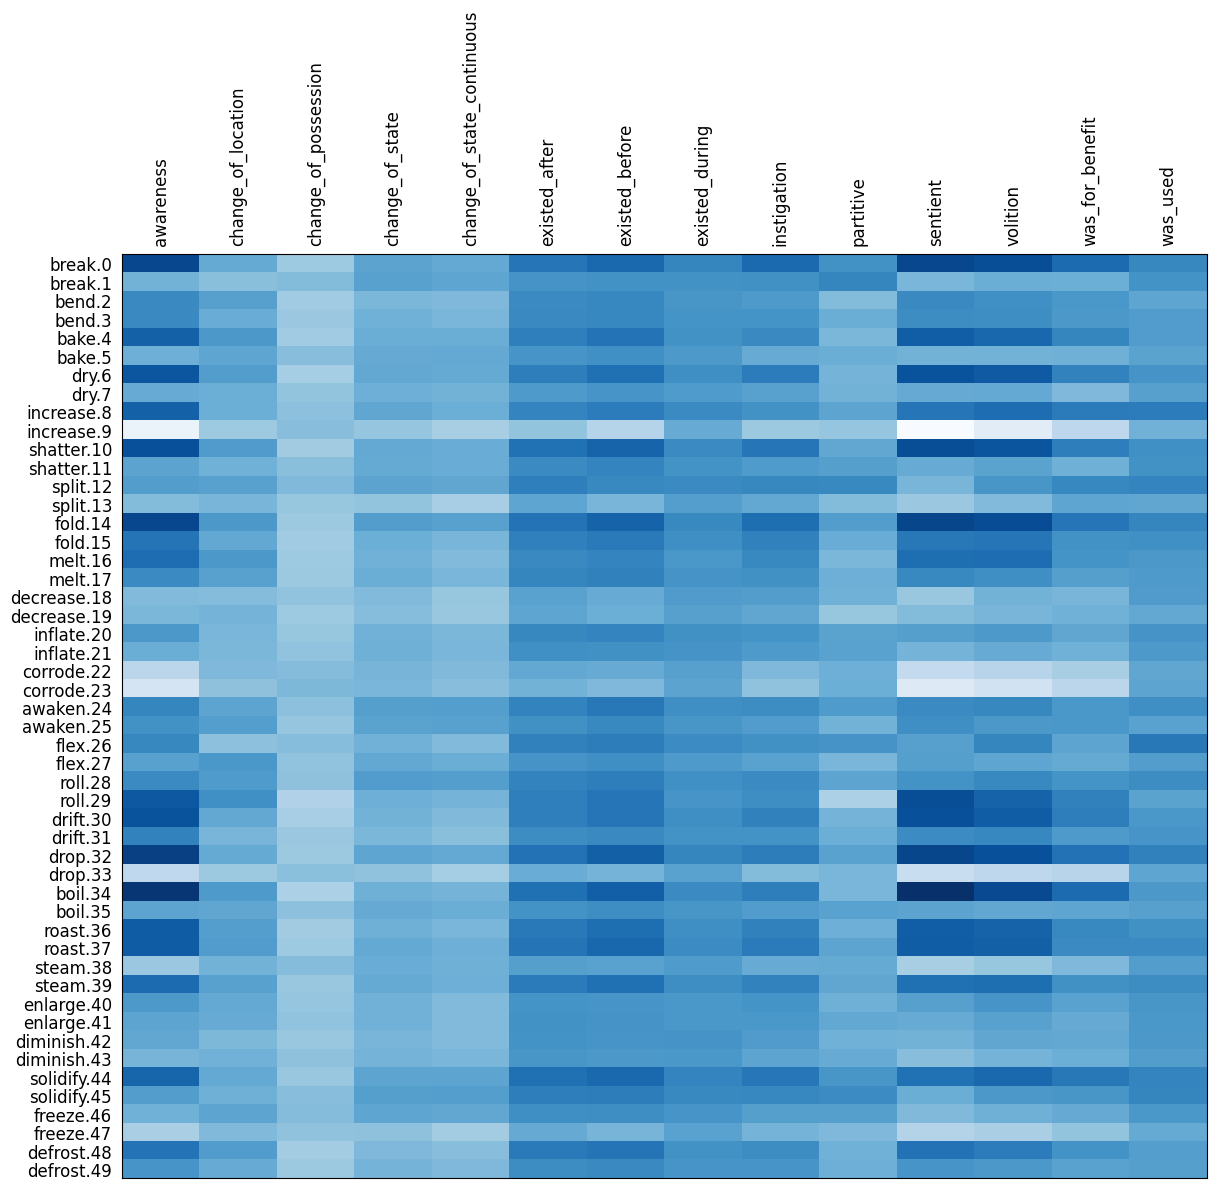

In [19]:
plt.figure(figsize=(14, 12))

# creaiamo una colormpa divergente in scala di grigi

colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

maxv = 0

for mat in bb_predictions.values[:50]:    
    maxv = max(maxv, max(mat.max(), - mat.min())) # si può eliminare con 'Blues'

#heatmap object
heatmap = plt.imshow(bb_predictions.values[:50], cmap = 'Blues', 
                    interpolation= 'nearest',
                    aspect='auto' )


plt.tick_params(bottom=False, top=False, left=False, right=False, 
                   labelsize=12)  # eliminiamo i tick 

plt.yticks(range(0,len(bb_predictions.index[:50])), bb_predictions.index[:50], fontsize=12)

plt.tick_params(labelbottom = False, labeltop = True)
plt.xticks(range(0,len(bb_predictions.columns)), bb_predictions.columns, rotation = 'vertical')
plt.show()

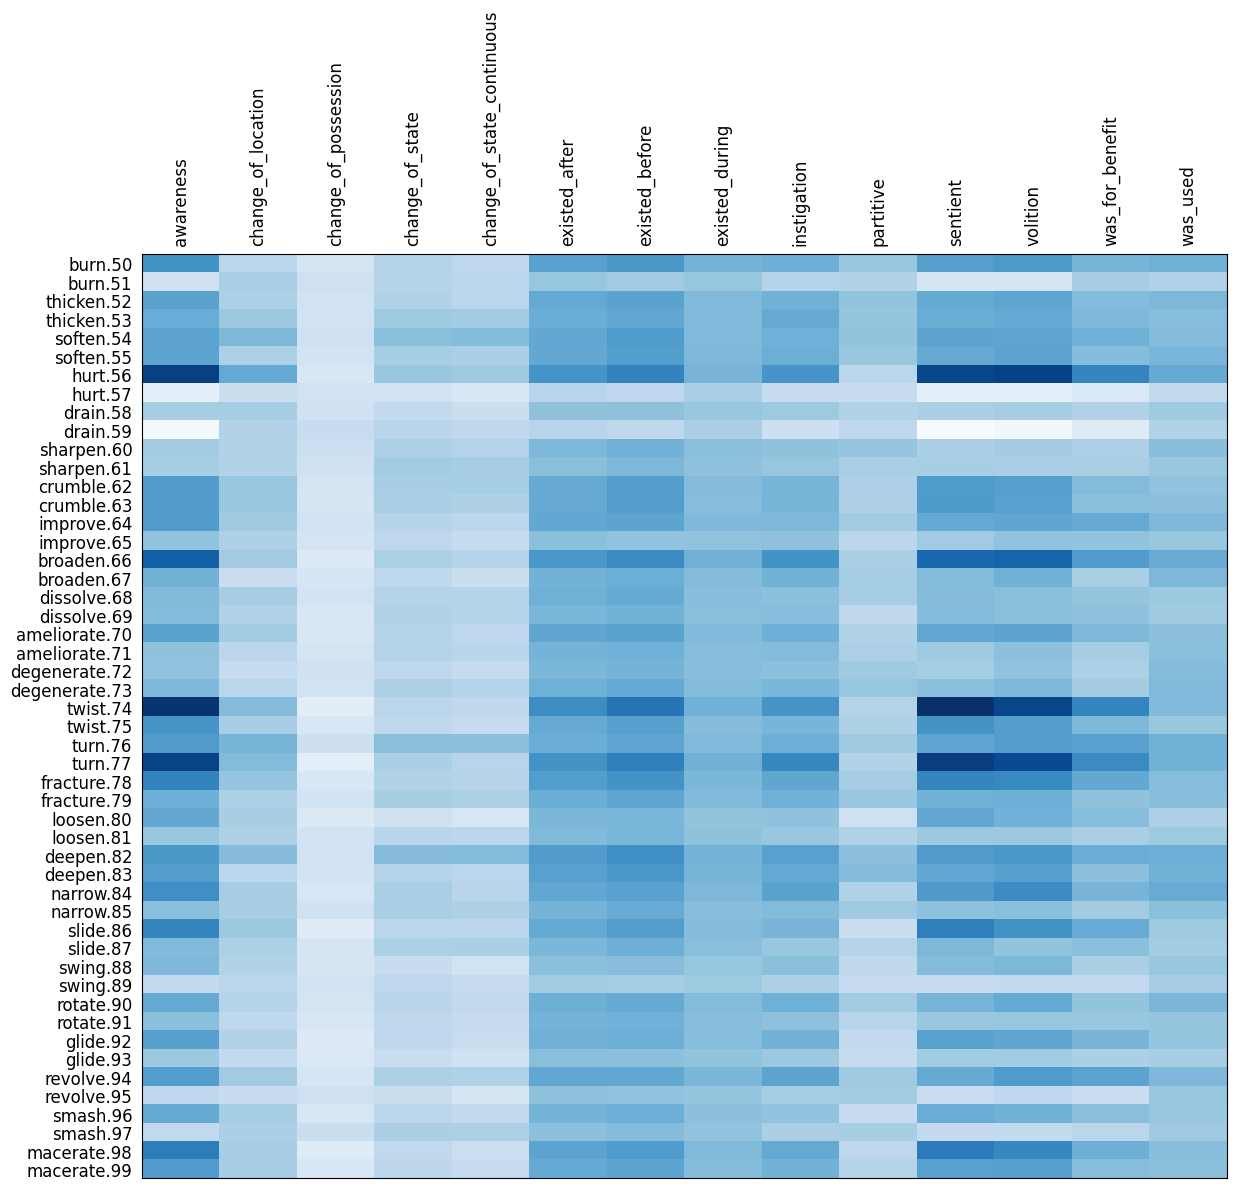

In [21]:
plt.figure(figsize=(14, 12))

# creaiamo una colormpa divergente in scala di grigi

colors1 = plt.cm.gist_gray(np.linspace(0., 1, 128))
colors2 = plt.cm.gist_yarg(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
divergentGrays = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

maxv = 0

for mat in bb_predictions.values[50:]:    
    maxv = max(maxv, max(mat.max(), - mat.min())) # si può eliminare con 'Blues'

#heatmap object
heatmap = plt.imshow(bb_predictions.values[50:], cmap = 'Blues', 
                    interpolation= 'nearest',
                    aspect='auto' )


plt.tick_params(bottom=False, top=False, left=False, right=False, 
                   labelsize=12)  # eliminiamo i tick 

plt.yticks(range(0,len(bb_predictions.index[50:])), bb_predictions.index[50:], fontsize=12)

plt.tick_params(labelbottom = False, labeltop = True)
plt.xticks(range(0,len(bb_predictions.columns)), bb_predictions.columns, rotation = 'vertical')
plt.show()